Un grafo (sin dirección) consiste de varios puntos (nodos, v'ertices) conectados por lineas (edges). En un grafo con dirección, los vértices van sólo en una dirección particular <br> 

###### Representacion
Hay muchas formas de representar un grafo de n nodos en una compu:<br> 
1) $\textbf{Matriz de Nodos}$: Se da una lista de n x n elementos y en la posici'on i,j se pone un 1 si el nodo i est'a conectado con el j y un 0 sino. <br> 
2) $\textbf{Lista de edjes}$: Se hace una lista en la que se pone: A est'a conectado con B,C ; B est'a conectado con A ; C est'a conectado con A y D , ..... <br>  <br> 

Grafo Denso: Es uno en el que |E| ~ |V|^2, lo que significa que casi todos los vertices est'an conectados entre todos. <br>
Grafo esparcido: |E| ~ |V|, los vertices tienen mas o menos una sola conexi'on

### Explorar Grafos

Path: Es una secuencia de vertices conectados por ejes.  <br>

Explorar: Si queremos explorar los vertices visitables desde un punto inicial, podemos ir visitando todas su conexiones. Sin embargo, nos conviene que cada eje tenga un atributo 'visitado' que valga 1 si ya hemos visitado el eje. <br> 

###### Depth First:
Se va lo m'as lejos  posible y s'olo se va hacia atr'as cuando lleguemos a un punto sin salida.  <br>
Un ejemplo que usa la lista de edjes puede ser:
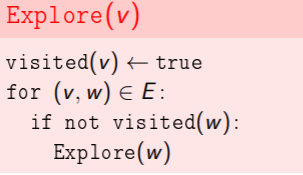

Este algorimo termina marcando por visitados a todos los vertices accesibles por v. <br> <br>

##### DFS 
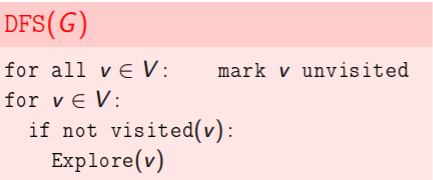
Con este algoritmo DFS podemos visitar todos los vertices de V. Primero no tenemos ningun vertice como visitado. Empezamos eligiendo un vetice v y vemos todos los accesibles por v. Luego elegimos otro v que no haya sido visitado y vemos todos sus accesibles y as'i.  El run time es de O(|V|+|E|)

###### Componentes conexos 
Un grafo G se puede particionar en componentes conexos. De tal forma que para dos elementos en un mismo subconjunto, estos estan conectados y son accesibles uno al otro. La relacion de accesibilidad (v ~ w si w es accesible desde v) es una relacion de equivalencia y los componentes conexos son las clases de equivalencia. <br>

###### Modificar DFS
Podemos modificar el algoritmo DFS de tal forma que al final a parte queden con atributos que indiquen en qu'e componente conexo se encuentran.
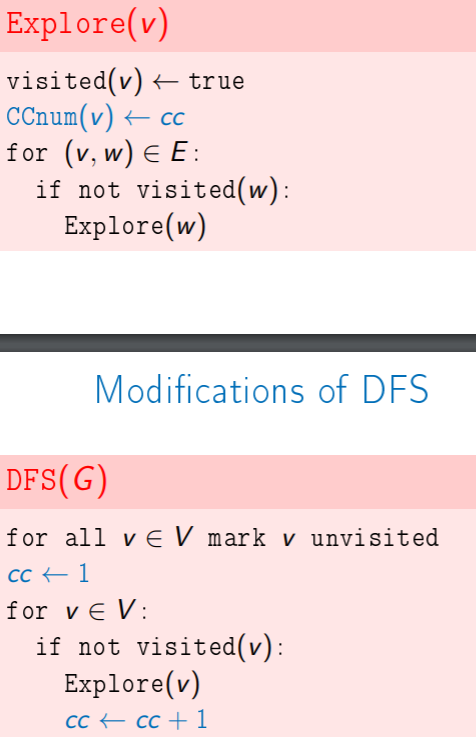

## Previsit and Postvisit
Podemos cambiar un poco el explore y el DFS para que vaya guardando informacion que nos interese. Por ejemplo, podemos ir corriendo un reloj mientras hacemos el DFS y que cada que se explore un elemento, al inicio se le asigne al vertice un valor previsit y al terminar de explorarlo (que invloucra terminar de explorar todos sus conectados) le asigna un numero postivisit
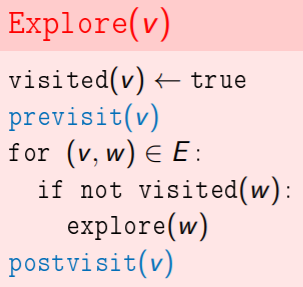

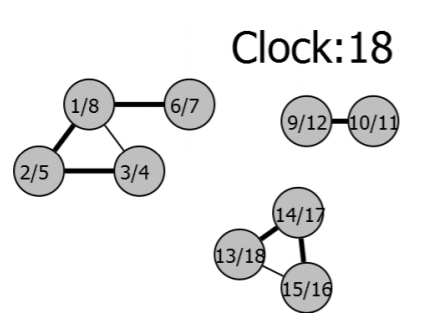
Donde previsit le asigna un numero v.pre = clock a v y hace que clock aumente en 1. Y postvisit le asigna un numero v.post = clock a v y hace que clock aumente en 1. <br> 

$\textbf{Propiedad:}$ Para cualesquiera vertices u,v. Los intervalos [u.pre, u.post] y [v.pre, v.post] son intervalos anidados o disconexos.

#### Representacion de grafos
Para representar un grado en los programas, siempre se pone primero los numeros n y m (numero de vertices y de ejes). Luego, se ponen pares de numeros i , j que significan que el vertice i se conecta con el j. Todo se numera desde el 1. 
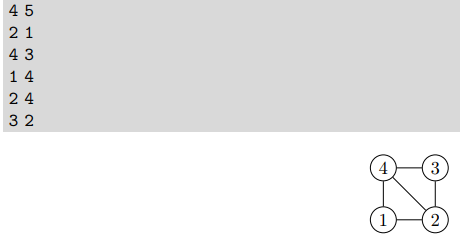
Se especifica desde antes si es un grafo direccionado o no.

###### 1. Finding an exit from a maze 
Dado un grafo no dirigido y dos vertices u, v, ver si se puede encontrar un camino desde u hasta v

In [4]:
''' La primera linea contiene los numeros de vertices n y de bordes m
los vertices estan numerados de 1 a n. Las siguientes m lineas representan
los m edjes mostrando su vertices conectados. Esta garantizado de que una graph
es simple (no self edjes y no varios edjes entre mismos vertices).'''
#Problema: Salir de un laberinto.
#Dado un grapho y dos vertices en particular (dados al final)
#Fijarse si existe una conexion entre estos vertices (output 1) o no (output 0 )

#Guarda los nodos y su lista de conexiones
# un objeto nodo tiene una lista de los puntos a los que est'a conectado 
# y tiene un atributo de visitado o no. 
class nodos:
    def __init__(self,ind, conex):
        self.ind = ind
        self.conex = conex
        self.visitado = 0


n , m = [int(x) for x in input().split()]

#Crea una lista de vertices con lista de vertices conectados.
#Son n vertices numerados de 0 a n-1. 
# Cada nodo tiene su indice (que no sirve de nada, pero bueno)  y la lista
#(por ahora vacia)  de conexiones. 
vertices = [nodos(i,[]) for i in range(n)]

#Vamos viendo los ejes. la primera entrada es el vertice de entrada(p-1 por la numeracion)
#El segundo elemento es donde acaba el eje (q-1)
#Tambien guardamos la segunda conexion (la inversa), porque es un grafo
# sin direccion. 


for i in range(m):
    p , q = [int(x) for x in input().split()]
    vertices[p-1].conex.append(q-1)
    vertices[q-1].conex.append(p-1)

#El programa nos dice donde empezar y terminar.
princ , fin = [int(x) for x in input().split()]

#Toma un objeto de vertices y le dice que si est'a visitado
#Luego va buscando en la lista de conectados de v y si el vertice correspondiente
#no est'a explorado, entonces lo explora.
'''
def Explora(ver, vertices):
    ver.visitado = 1
    for w in ver.conex:
        if vertices[w].visitado == 0:
            Explora(vertices[w], vertices)
'''
#El explora termina por visitar todos los puntos conectados con v.
#Podemos ver si dos vertices estan conectados si antes de acavar nos da u

def Busca_de_v_a_u(v, vertices, u):
    # hacemos que end sea una variable global. 0 indica que no llegamos a u
    # 1 indica que ya llegamos. 
    global end
    if end == 1:
        return
    #indicamos que est'a visitado.
    v.visitado = 1
    for w in v.conex:
        # si no ha sido visitado
        if vertices[w].visitado == 0:
            # si ya llegamos a donde queremos
            if vertices[w] == u:
                #marcamos que ya
                end = 1
            #sino, ahora hay que buscar desde vertices[w]
            Busca_de_v_a_u(vertices[w], vertices, u)





global end
end = 0

Busca_de_v_a_u(vertices[princ-1], vertices, vertices[fin-1])
print(end)
    

fasdc


ValueError: invalid literal for int() with base 10: 'fasdc'

#### 2. Contar numero de componentes conexos en un grafo
Justo eso, tenemos que contar el numero de componentes conexos en un grafo.

In [5]:
''' Adding exits to a maze '''
''' Dada una grafica (input como en el otro ej) outputear el numero de componentes
conectados'''

#Hacemos una clase de nodos, cada uno con la lista de conexos y con 
# la indicacion de si fue o no visitado
class nodos:
    def __init__(self, conex):
        self.conex = conex
        self.visitado = 0


#tomamos el numero de vertices n y de ejes m.
n , m = [int(x) for x in input().split()]

#Crea una lista de vertices con lista de vertices conectados.
#Son n vertices numerados de 0 a n-1. 
# inicializamos la conexion de cada nodo con una lista vacia.
vertices = [nodos([]) for i in range(n)]

#Vamos viendo los ejes. la primera entrada es el 
#vertice de entrada(p-1 por la numeracion)
#El segundo elemento es donde acaba el vertice (q-1)
#Tambien guardamos la segunda conexion (la inversa), por ser sin direccion
for i in range(m):
    p , q = [int(x) for x in input().split()]
    vertices[p-1].conex.append(q-1)
    vertices[q-1].conex.append(p-1)
    

#explora toma un nodo ver, la lista de vertices y el valor actual de cc
# cc es el componente conexo actual
def Explora(ver, vertices, cc):
    #explora primero indica que ver esta visitado
    ver.visitado = 1
    # y le asigna su valor de componente conexo corresponeidnte
    ver.cc = cc
    #para cada w conextado a ver
    for w in ver.conex:
        #si w no ha sido visitado
        if vertices[w].visitado == 0:
            # lo visitamos y le pondremos el mismo numero cc de componente.
            Explora(vertices[w], vertices, cc)

def DFS(vertices):
    cc = 0
    #Va por todos los vertices y visita su grupo conexo
    #Es decir, va a visitar primero el grupo conexo del vertice[0]
    #Y cuando acabe, vera si vertice[1], vertice[2], ... fueron visitados
    #Al primero que no, lo visita y a todo su grupo y les da un nuevo numero de cc
    for ver in vertices:
        if ver.visitado == 0:
            Explora(ver, vertices, cc)
            cc = cc +1
    #al final, damos como resultado el numero de componentes conexos que se usaron
    return(cc)

print(DFS(vertices))
        


fr


ValueError: invalid literal for int() with base 10: 'fr'